# Rental Prices- Explanatory Data Analysis 

## Investigation Overview

A dataset from a A housing rental company includes details about each property rented, Number of bedrooms, Number of bathrooms, as well as the price charged per night is provided. Data analysis of the the given data is done to answer the follwing questions:
<ol>    
    <li>What are main factors affect rental price?.</li>
    <li>Do number of bathrooms has significant effect on price?.</li>
    <li>Are there certain property or room types that have higher rental prices?.</li>

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data and printing out a few lines. 
df = pd.read_csv('rentals_cleaned_csv', index_col=0)

## Distribution of Rental Prices

Price distribution is skewed, most pooular prices are under 20000$

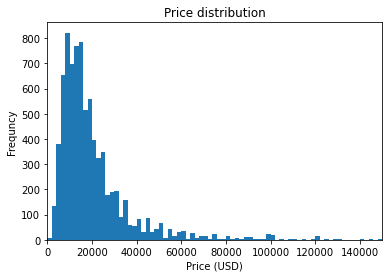

In [3]:
# # univariate plot of price wirh setting Xlimit to get rid of outliers effect 
bins = np.arange(0, df['price'].max()+2000, 2000)
plt.hist(df.price, bins = bins)
plt.xlabel('Price (USD)')
plt.ylabel('Frequncy')
plt.title('Price distribution')
plt.xlim((0,150000));

## Distribution of Bedrooms, Bathrooms and Minimum nights

Most popular rentals have only one to two bedrooms, the same for bathrooms, We see that most of rentals are month rentals, follwoed by few 2 to 3 days rentals.

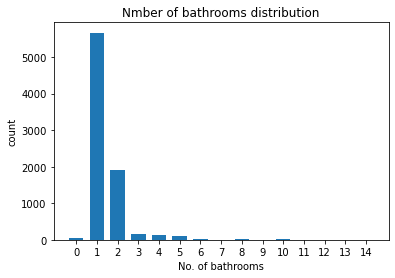

In [4]:
# univariate plot of bathrooms
bins = np.arange(-.5, df['bathrooms'].max()+1, 1)
plt.hist(data = df, x = 'bathrooms', bins = bins, rwidth = 0.7)
plt.xticks(np.arange(0, 14+1, 1))
plt.xlabel('No. of bathrooms')
plt.title('Nmber of bathrooms distribution')
plt.ylabel('count');

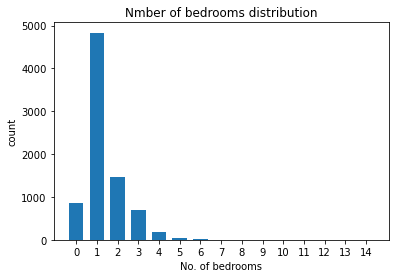

In [5]:
# univariate plot of bedrooms
bins = np.arange(-.5, df['bedrooms'].max()+1, 1)
plt.hist(data = df, x = 'bedrooms', bins = bins, rwidth = 0.7)
plt.xticks(np.arange(0, 14+1, 1));
plt.xlabel('No. of bedrooms')
plt.title('Nmber of bedrooms distribution')
plt.ylabel('count');

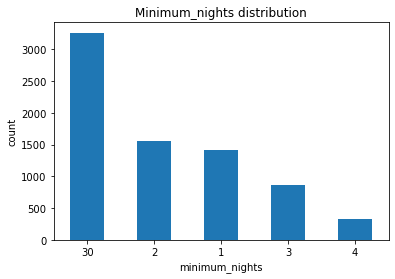

In [6]:
# univariate plot of minimum_nights
df.minimum_nights.value_counts().head().plot(kind='bar')
plt.xlabel('minimum_nights')
plt.ylabel('count')
plt.title('Minimum_nights distribution')
plt.xticks(rotation=0);

## Price vs. Bedrooms and Bathrooms 

Price increases with the increase of the Number of bedrooms, bath rooms have low effect on price.

In [7]:
# Define a function plot_line_heat() 
def plot_scatter_heat(df, price, column):
    """ Shows the relation between price and the other numerical column by returning a heat map and a scatterplot"""
    plt.figure(figsize = [18, 6])
    plt.suptitle('relation between price and ' + column);

    # PLOT ON LEFT
    plt.subplot(1, 2, 1)
    sns.scatterplot(data = df, x = column, y = price, ci=False)
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price')

    # PLOT ON RIGHT
    plt.subplot(1, 2, 2)
    plt.hist2d(data = df, x = column, y = price, cmin=0.5, cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price (USD)')

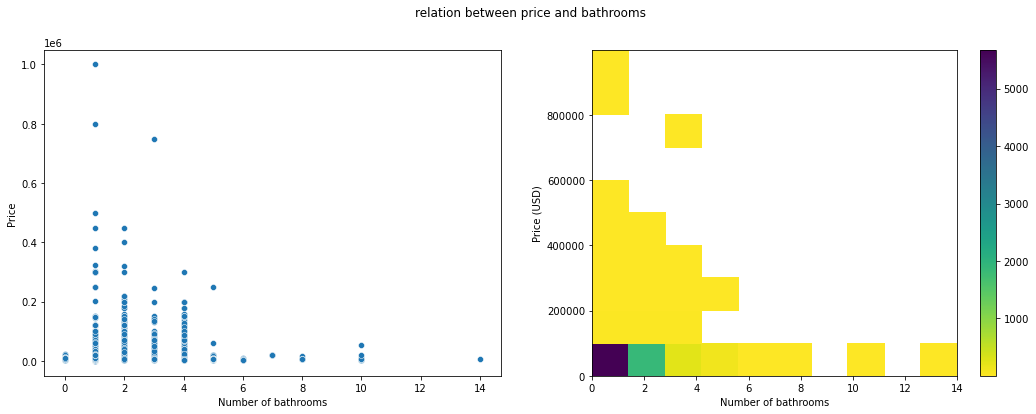

In [10]:
# The relation between price and bathrooms 
plot_scatter_heat(df, 'price', 'bathrooms')

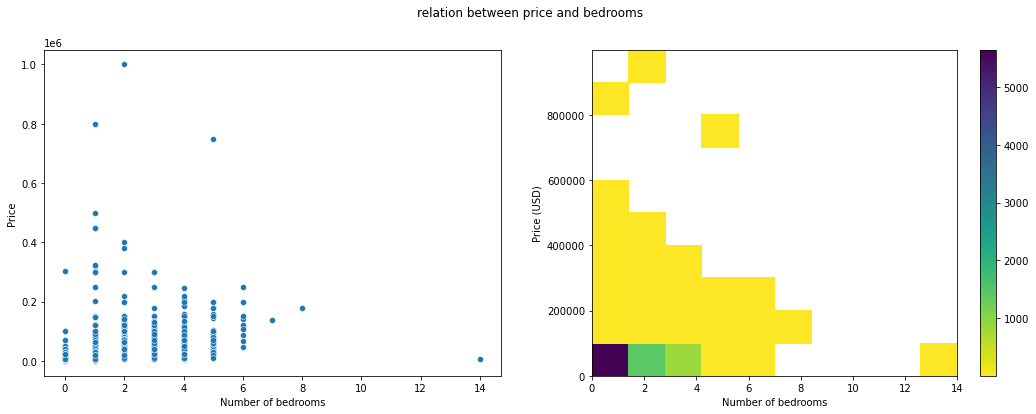

In [9]:
# The relation between price and bedrooms 
plot_scatter_heat(df, 'price', 'bedrooms')

## Price and Room Types and Property Types

There is a relationship between price property types of Resort, Villa, Earth house, and the room type of Entire home/apt as they have the higest mean prices, The two combinations of Entire home/apt and villa has higest prices.

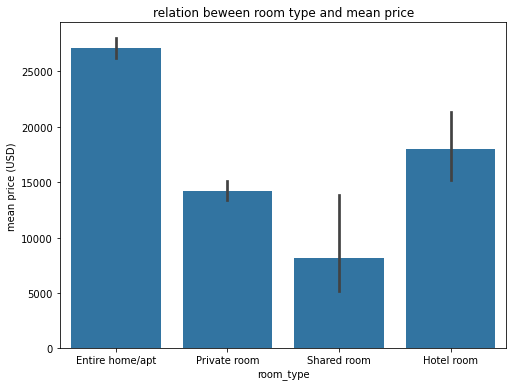

In [17]:
# The relation beween room type and mean price
base_color = sns.color_palette()[0]
sns.barplot(data =df, x= 'room_type', y= 'price', color= base_color)
plt.ylabel('mean price (USD)')
plt.title('relation beween room type and mean price')
plt.rcParams['figure.figsize'] = 8,6;

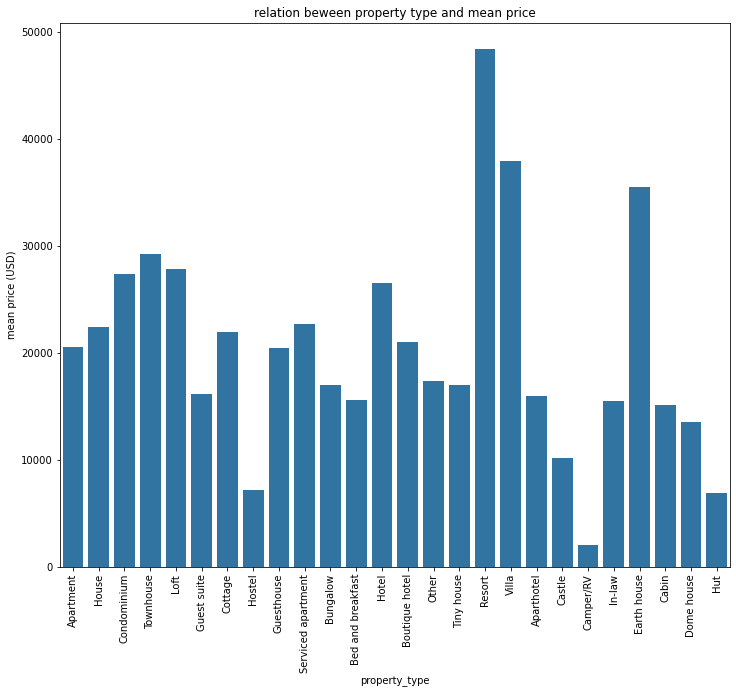

In [19]:
# The relation beween property type and price 
base_color = sns.color_palette()[0]
sns.barplot(data =df, x= 'property_type', y= 'price', color= base_color, ci=False)
plt.xticks(rotation=90)
plt.ylabel('mean price (USD)')
plt.title('relation beween property type and mean price')
plt.rcParams['figure.figsize'] = 12,10;

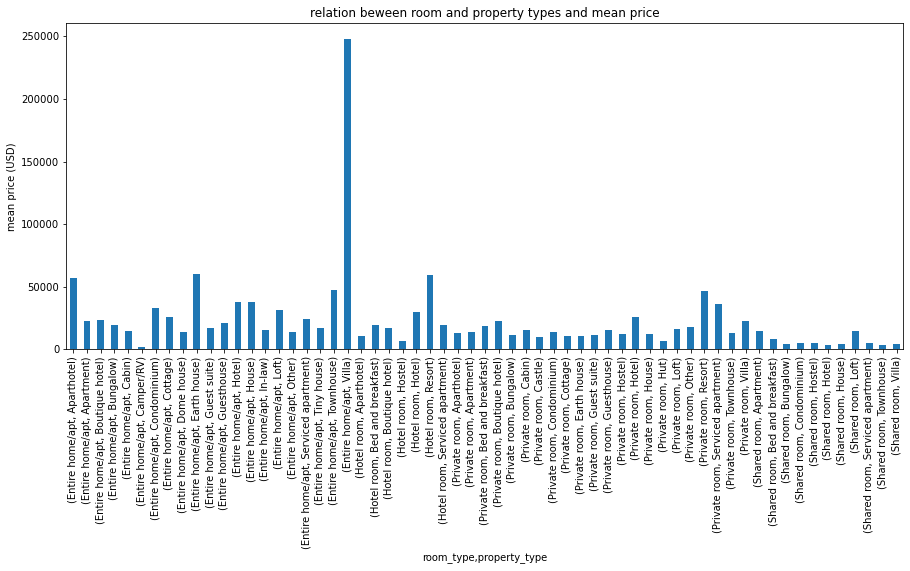

In [30]:
# Relation between room type, property type and mean price
df.groupby(['room_type','property_type'])['price'].mean().plot(kind= 'bar')
plt.ylabel('mean price (USD)')
plt.title('relation beween room and property types and mean price')
plt.rcParams['figure.figsize'] = 15,6;

## Price and Number of Bath rooms and Bedrooms by Room and Property Types

From the multivariate exploration we know that the reason was due to different categories types of room and property, The Entire home/apt was the room type was the only one to increase in price when bathroom and bedroom numbers increases.

In [31]:
# Define a function plot_line_category() 
def plot_scatter_category(df, price, column, categroy):
    """ Shows the relation between price and the other numerical column according to a specefic category type using a scaterplot"""
    plt.figure(figsize = [18, 6])
    plt.title('relation between price and ' + column + ' by ' + categroy);
    sns.scatterplot(data = df, x = column, y = price, hue=categroy ,ci=False)
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price (USD)')

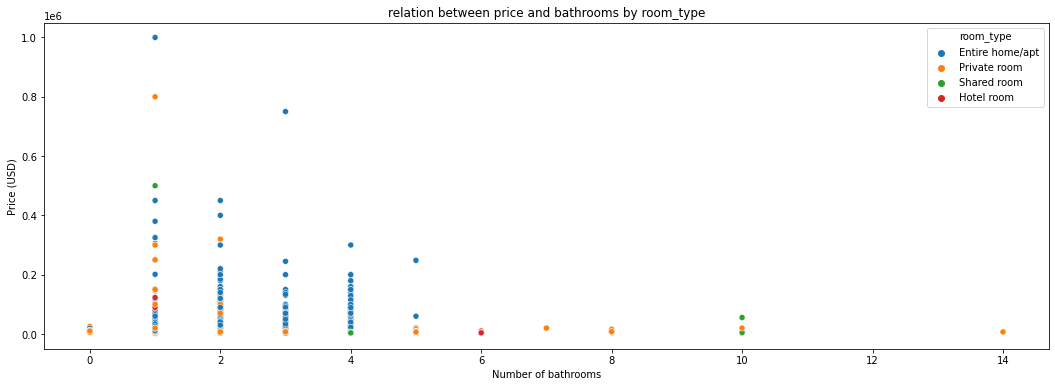

In [32]:
plot_scatter_category(df, 'price', 'bathrooms', 'room_type')

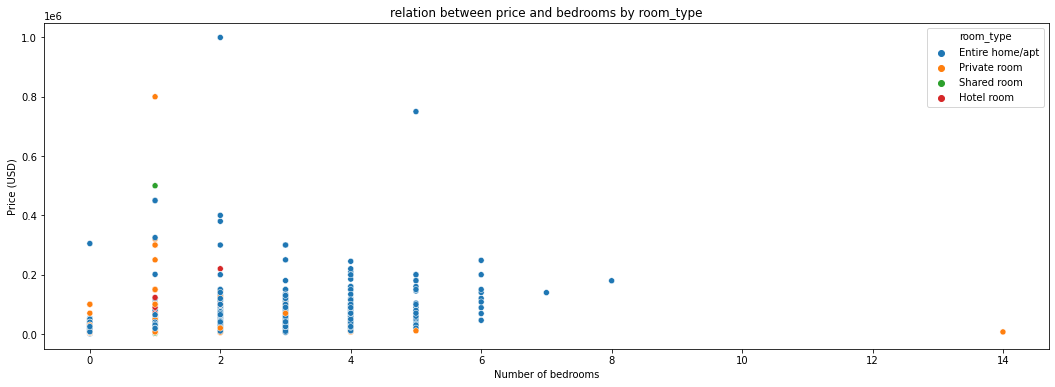

In [33]:
plot_scatter_category(df, 'price', 'bedrooms', 'room_type')

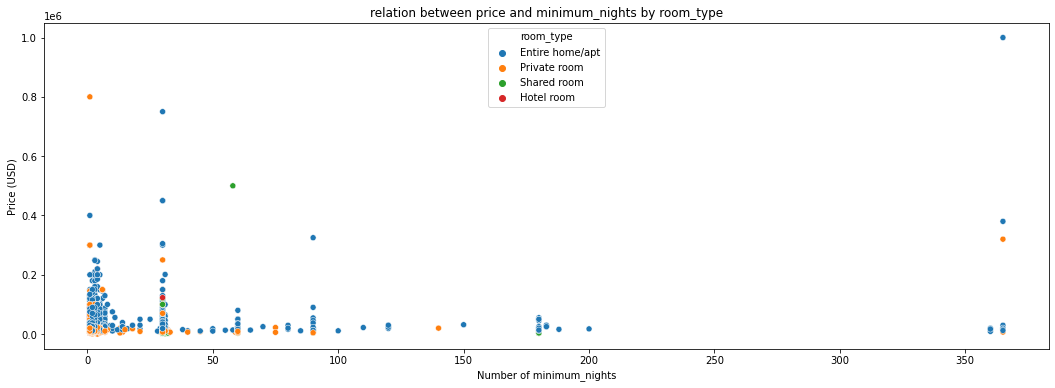

In [35]:
plot_scatter_category(df, 'price', 'minimum_nights', 'room_type')

## Regression Model

We finished with some Regression to predict the price. the top important features were bedrooms, minimum nights, bathrooms_bderooms, and property type of twon house.

In [46]:
dummies = pd.get_dummies(df, prefix_sep='_')
dummies['bathrooms_bedrooms'] = dummies['bathrooms'] * dummies['bedrooms']
X = dummies.drop(['id','latitude' ,'longitude','bathrooms','price','property_type_Aparthotel','room_type_Shared room'], axis= 1)
y = df[['price']]

# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=.33,
                                random_state=42)
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Import Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

In [47]:
# Instantiate regressors 
reg = LinearRegression()

#fit reg to the training set
reg.fit(rescaledX_train, y_train)
    
# Predict the labels of the test set
y_pred = reg.predict(rescaledX_test)

# Evaluate the test-set RMSE of reg on the test set
print('{:s} : {:.3f}'.format('linear regression MSE', MSE(y_test, y_pred)**.5))

linear regression MSE : 27998.986


In [48]:
# Create a plot of features importances using random_forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=SEED)
rf.fit(rescaledX_train, y_train)

<ipython-input-48-2bc682d68965>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(rescaledX_train, y_train)


RandomForestRegressor(random_state=1)

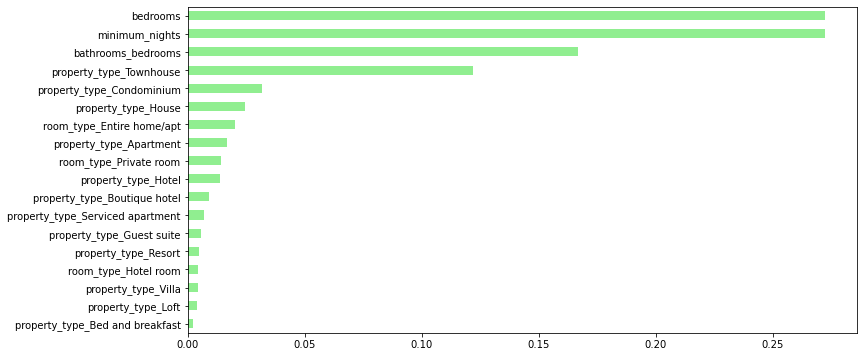

In [78]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()[13:]
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()
plt.rcParams['figure.figsize'] = 12,6

## conclusion 

From previous explanatory data analysis data analysis we can conclude the follwoing conclusion:</p>
<ol> 
<li>Bedrooms have the higest effect on rental peice, followed by the minimum nights.</li>
<li>There is a linear relation between price, and numerical features except for the bathrooms that is replaced by the interaction term of bathrooms multiplied by bedrooms, actualy we don't need bathrooms in our model, also there is no multimulticollinearity.</li>
<li>Price distribution is skewed, most common prices are under 20000$.</li>
<li>Most popular rentals have only one to two bathrooms.</li>
<li>Most popular rentals have only one to two bedrooms.</li>
<li>Most of rentals are month rentals, follwoed by few 2 to 3 days rentals.</li>
<li>Most common room and property type are the apartment type for both the room and the property.</li>
<li>There is a relationship between price and property types of Resort, Villa, Earth house, and the room type of Entire home/apt as they have the higest mean prices. </li>
<li>The two combinations of Entire home/apt and villa have the higest prices.</li>
<li>The Entire home/apt was the room type was the only one to increase in price when bathroom and bedroom numbers increases.</li>
<li>The top important features were bedrooms, minimum nights, bath_bed rooms ,and property type of twon house.</li>

In [ ]:
!jupyter nbconvert Rental_prices_explanatory_data_analysis.ipynb --to slides --post serve --no-input --no-prompt